# Problem 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('SP500_close_price_no_missing.csv', index_col=0, parse_dates=True)
df.head(5)

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,86.79,62.24,47.82,58.03,31.29,8.47,12.54,31.04,57.54,41.88,...,30.67,108.99,23.56,11.71,29.42,22.16,16.75,49.09,54.97,25.17
2011-01-04,86.67,62.20,48.27,56.22,31.51,8.77,12.60,31.20,56.49,41.49,...,30.48,112.39,23.66,11.40,29.54,22.05,16.59,48.34,54.24,24.76
2011-01-05,86.67,61.99,48.27,55.35,32.22,8.91,12.77,31.50,56.38,41.40,...,30.38,113.84,23.52,11.46,29.64,22.17,16.91,48.57,54.28,24.90
2011-01-06,86.14,61.72,48.17,53.53,32.27,8.69,12.99,32.09,56.07,41.48,...,29.94,114.67,23.50,11.46,30.14,22.16,17.06,48.91,52.60,24.83
2011-01-07,86.23,61.26,48.37,53.57,32.04,8.83,12.99,32.16,55.85,41.62,...,29.83,118.73,23.71,11.30,29.97,22.12,16.90,49.52,52.59,24.57


In [3]:
# Load ticker dataset
ticker_df = pd.read_csv("SP500_ticker.csv", encoding='ISO-8859-1')
ticker_df.head(5)

,ticker,company_name,sector
0,MMM,3M Co.,Industrials
1,ACE,ACE Limited,Financials
2,ABT,Abbott Laboratories,Health Care
3,ANF,Abercrombie & Fitch Company A,Consumer Discretionary
4,ADBE,Adobe Systems Inc,Information Technology


In [4]:
# Calculate log returns for each stock
log_returns = np.log(df.shift(-1) / df)

## Derive log returns from the raw stock price dataset


In [5]:
# Drop the first row since it will have NaN in log returns
log_returns = log_returns.dropna()
log_returns

,MMM,ACE,ABT,ANF,ADBE,AMD,AES,AET,AFL,A,...,WYN,WYNN,XEL,XRX,XLNX,XL,YHOO,YUM,ZMH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2011-01-03,-0.001384,-0.000643,0.009366,-0.031688,0.007006,0.034806,0.004773,0.005141,-0.018417,-0.009356,...,-0.006214,0.030719,0.004235,-0.026830,0.004071,-0.004976,-0.009598,-0.015396,-0.013369,-0.016423
2011-01-04,0.000000,-0.003382,0.000000,-0.015596,0.022282,0.015837,0.013402,0.009569,-0.001949,-0.002172,...,-0.003286,0.012819,-0.005935,0.005249,0.003380,0.005427,0.019105,0.004747,0.000737,0.005638
2011-01-05,-0.006134,-0.004365,-0.002074,-0.033434,0.001551,-0.025001,0.017081,0.018557,-0.005514,0.001931,...,-0.014589,0.007264,-0.000851,0.000000,0.016728,-0.000451,0.008831,0.006976,-0.031440,-0.002815
2011-01-06,0.001044,-0.007481,0.004143,0.000747,-0.007153,0.015982,0.000000,0.002179,-0.003931,0.003369,...,-0.003681,0.034794,0.008896,-0.014060,-0.005656,-0.001807,-0.009423,0.012395,-0.000190,-0.010526
2011-01-07,0.010613,-0.013145,-0.008930,0.012429,0.028310,0.039961,-0.001541,0.001864,-0.012975,0.014313,...,-0.008754,-0.000253,-0.006347,0.009687,0.007976,0.000904,-0.017911,0.001413,0.007766,-0.018070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-24,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2014-12-25,-0.004201,0.001550,0.003277,0.005686,-0.000937,0.000000,0.029256,0.002787,0.000000,0.006060,...,0.007442,-0.003518,0.009614,0.004252,-0.003863,-0.000584,0.004138,0.004797,0.000526,0.001402
2014-12-26,0.002703,0.002235,-0.005467,0.016518,-0.007258,0.003766,0.010493,-0.001002,0.000968,-0.001209,...,0.005200,0.017339,0.018150,0.000000,-0.002964,0.007565,-0.006510,0.005726,-0.005886,0.005587


In [6]:
# Standardize the data
scaler = StandardScaler()
log_returns_scaled = scaler.fit_transform(log_returns)

In [7]:

# Fit PCA model
num_components = min(log_returns.shape[0], log_returns.shape[1])  # Number of components should be less than or equal to the number of observations
pca = PCA(n_components=num_components)
pca.fit(log_returns_scaled)

PCA(n_components=471)

## Plot a scree plot which shows the distribution of variance contained in subsequent principal components sorted by their eigenvalues.


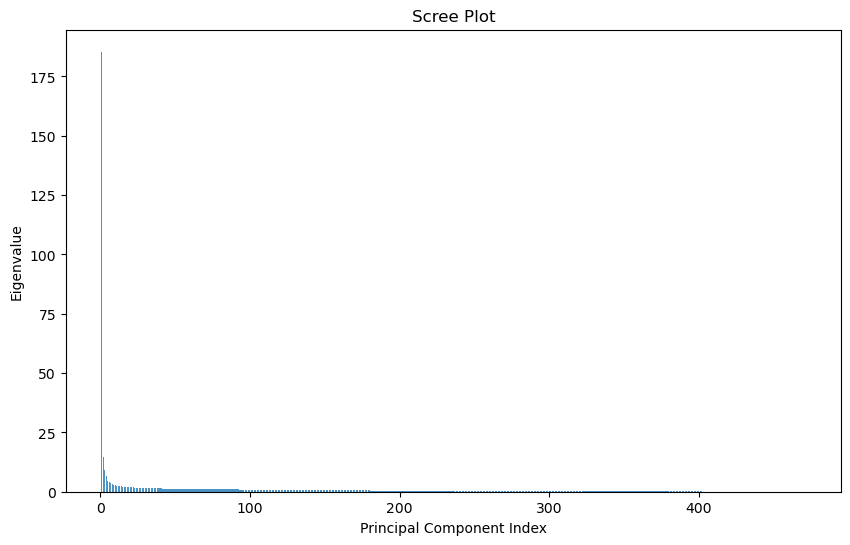

In [8]:
# Scree plot
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Sort eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, alpha=0.8, align='center')
plt.title('Scree Plot')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.show()

## Create a second plot showing cumulative variance retained if top N components are kept after dimensionality reduction (i.e. the horizontal axis will show the number of components kept, the vertical axis will show the cumulative percentage of variance retained).


C:\Users\arjun\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


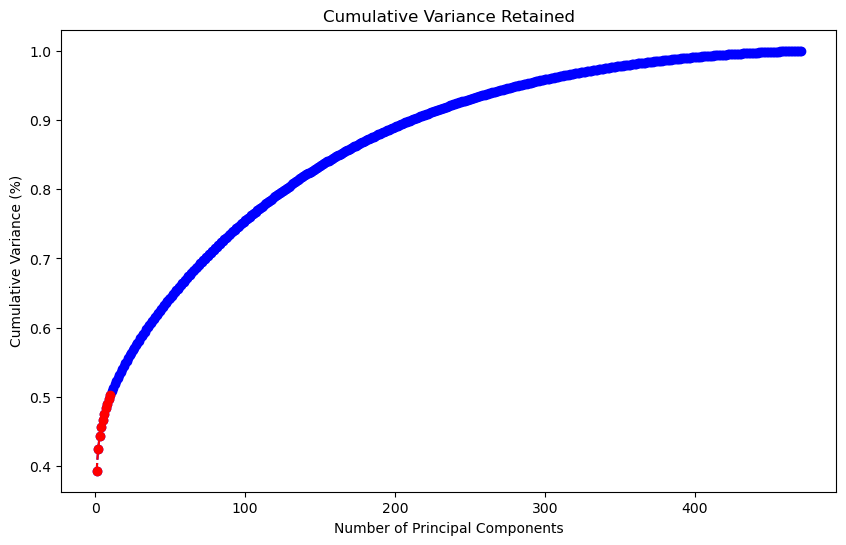

In [9]:
# Perform dimensionality reduction
#considering top 10 components
num_components = 10 
reduced_data = pca.transform(log_returns)[:, :num_components]

# Cumulative variance plot for top N components
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')


# Calculate cumulative variance for reduced data
cumulative_variance_reduced = np.cumsum(pca.explained_variance_ratio_[:num_components])
plt.plot(range(1, num_components + 1), cumulative_variance_reduced, marker='o', linestyle='--', color='r', label='Reduced Data')

plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance (%)')
plt.show()

## How many principal components must be retained in order to capture at least 80% of the total variance in data?

In [10]:
# Find the number of components to capture at least 80% of the variance
n_components_80 = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of components to capture at least 80% variance: {n_components_80}")

Number of components to capture at least 80% variance: 127


## Compute and plot the time series of the 1st principal component and observe temporal patterns. Identify the date with the lowest value for this component and conduct a quick research on the Internet to see if you can identify event(s) that might explain the observed behavior.

C:\Users\arjun\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


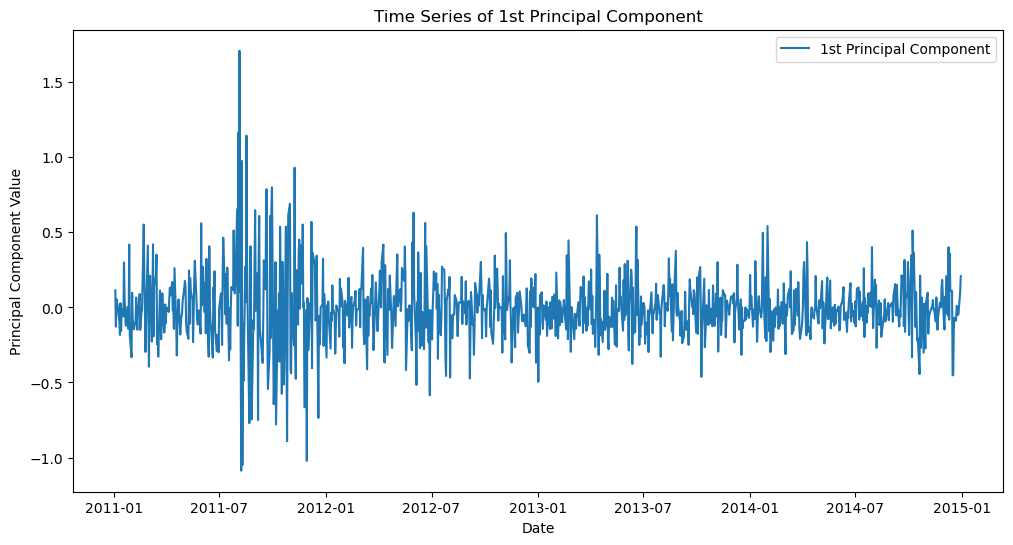

In [11]:
# Calculate principal components
principal_components = pca.transform(log_returns)

# Extract the 1st principal component time series
pc1_time_series = principal_components[:, 0]

# Plot the time series of the 1st principal component
plt.figure(figsize=(12, 6))
plt.plot(log_returns.index, pc1_time_series, label='1st Principal Component')
plt.title('Time Series of 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()

In [12]:
# Identify the date with the lowest value for the 1st principal component
min_pc1_index = np.argmin(pc1_time_series)
min_pc1_date = log_returns.index[np.argmin(pc1_time_series)]
print(f"Date with the lowest value for the 1st principal component: {min_pc1_date}")

Date with the lowest value for the 1st principal component: 2011-08-08 00:00:00


In [13]:
# Identify the stock name with the lowest value
min_pc1_stock_name = df.columns[np.argmin(log_returns.values[min_pc1_index])]
print(f"Stock name with the lowest value for the 1st principal component: {min_pc1_stock_name}")

Stock name with the lowest value for the 1st principal component: CVC


In [14]:
# Filter the DataFrame for the specified ticker
selected_ticker_df = ticker_df[ticker_df['ticker'] == min_pc1_stock_name]
selected_ticker_df

,ticker,company_name,sector
73,CVC,Cablevision Systems Corp.,Consumer Discretionary


In [15]:
min_pc1_value = np.min(pc1_time_series)
print(f"Lowest value for the 1st principal component: {min_pc1_value}")

Lowest value for the 1st principal component: -1.0876594742582124


## Extract the weights from the PCA model for 1st and 2nd principal components. 

In [16]:
weights_pc1 = pca.components_[0]
weights_pc2 = pca.components_[1]

# Display the weights
print("Weights for the 1st principal component:")
print(weights_pc1)

print("\nWeights for the 2nd principal component:")
print(weights_pc2)

Weights for the 1st principal component:
[-0.06148286 -0.05612293 -0.01338367 -0.03142776 -0.04873121 -0.03739019
 -0.05189389 -0.04368021 -0.05903906 -0.05146821 -0.05518395 -0.05411716
 -0.04362366 -0.0379498  -0.05502761 -0.05357572 -0.04042444 -0.05536893
 -0.04513837 -0.03938982 -0.03666691 -0.04441632 -0.04092533 -0.05768976
 -0.05357866 -0.04201156 -0.06338442 -0.04514652 -0.03825544 -0.03280334
 -0.0522285  -0.05389427 -0.05285698 -0.05189078 -0.05046586 -0.02746048
 -0.00855835 -0.05017396 -0.05091829 -0.05338743 -0.04309722 -0.04969014
 -0.0555124  -0.04393453 -0.03207285 -0.04537758 -0.05116935 -0.03199813
 -0.04889843 -0.0251804  -0.05309729 -0.05897595 -0.04608874 -0.04877988
 -0.05732623 -0.04962918 -0.03849037 -0.05048002 -0.06121387 -0.02521246
 -0.02667146 -0.0364229  -0.06182838 -0.04243292 -0.0026297  -0.05293305
 -0.05372974 -0.04229311 -0.03708482 -0.04393482 -0.03557961 -0.04287546
 -0.05175368 -0.03206475 -0.02687835 -0.05160657 -0.03594994 -0.0544989
 -0.0475701

## Create a plot to show weights of the 1st principal component grouped by the industry sector. Observe the distribution of weights (magnitudes, signs). Based on your observation, what kind of information do you think the 1st principal component might have captured?


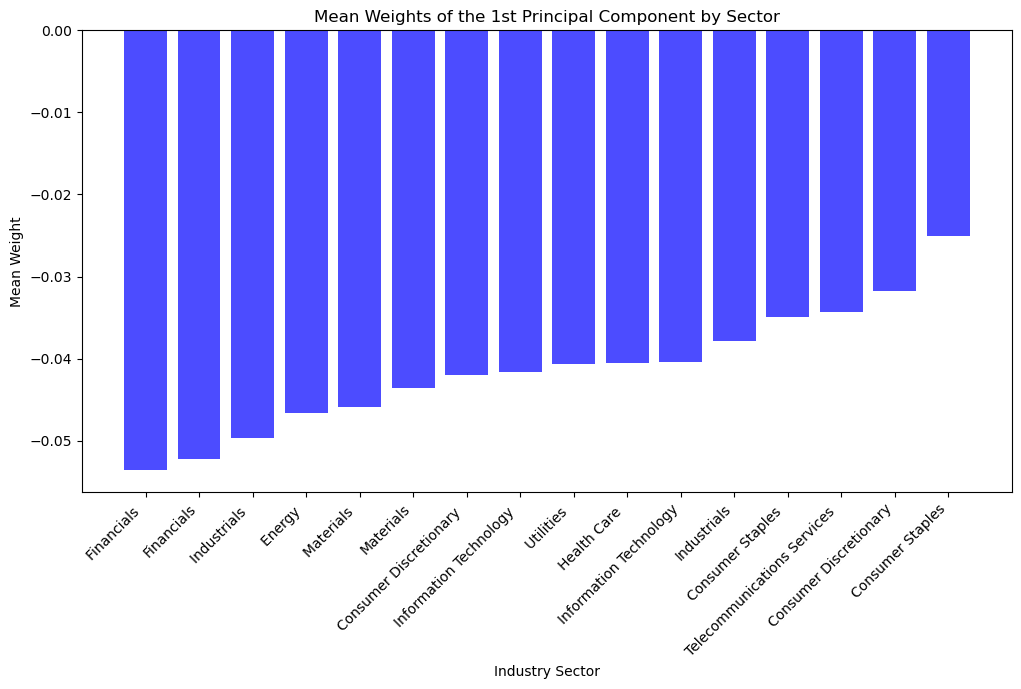

In [17]:
# Merge ticker information with weights of the 1st principal component
weights_df = pd.DataFrame({'Ticker': df.columns, 'Weight_PC1': weights_pc1})
merged_df = pd.merge(ticker_df, weights_df, left_on='ticker', right_on='Ticker')

# Group by sector and calculate mean weight for each sector
mean_weights_by_sector = merged_df.groupby('sector')['Weight_PC1'].mean().reset_index().sort_values(by='Weight_PC1', ascending=True)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(mean_weights_by_sector['sector'], mean_weights_by_sector['Weight_PC1'], color='blue', alpha=0.7)
plt.title('Mean Weights of the 1st Principal Component by Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.xticks(rotation=45, ha='right')
plt.show()

In [18]:
weights_df.head()

,Ticker,Weight_PC1
0,MMM,-0.061483
1,ACE,-0.056123
2,ABT,-0.013384
3,ANF,-0.031428
4,ADBE,-0.048731


## Make a similar plot for the 2nd principal component.  What kind of information do you think does this component reveal? 

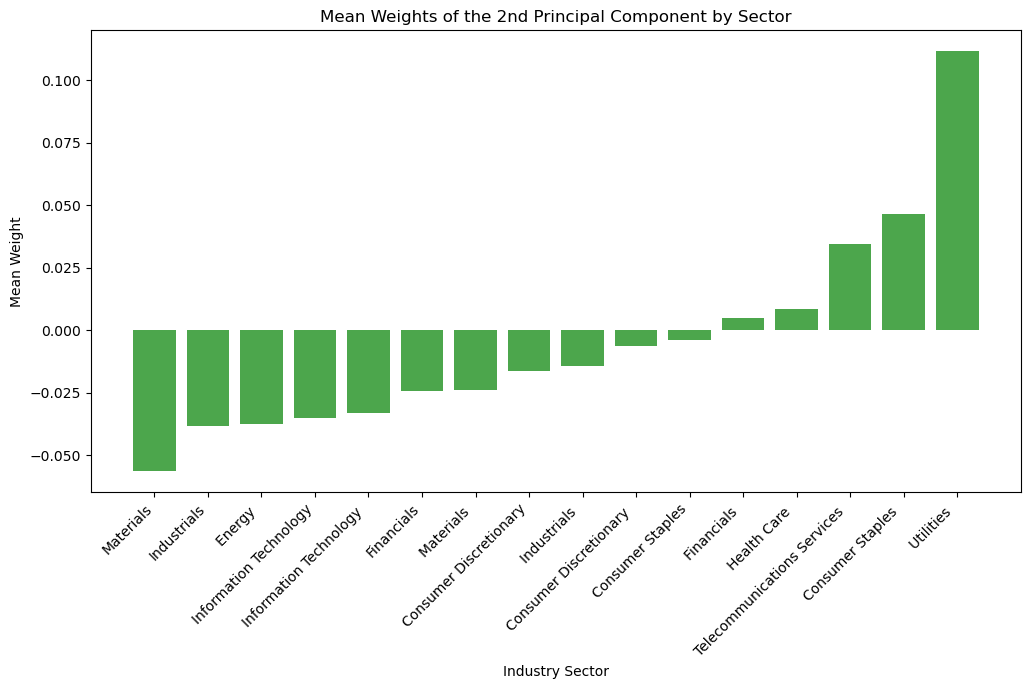

In [19]:
# Merge ticker information with weights of the 2nd principal component
weights_df_2 = pd.DataFrame({'Ticker': df.columns, 'Weight_PC2': weights_pc2})
merged_df_2 = pd.merge(ticker_df, weights_df_2, left_on='ticker', right_on='Ticker')

# Group by sector and calculate mean weight for each sector
mean_weights_by_sector_2 = merged_df_2.groupby('sector')['Weight_PC2'].mean().reset_index().sort_values(by='Weight_PC2', ascending=True)

# Create a bar plot for the 2nd principal component
plt.figure(figsize=(12, 6))
plt.bar(mean_weights_by_sector_2['sector'], mean_weights_by_sector_2['Weight_PC2'], color='green', alpha=0.7)
plt.title('Mean Weights of the 2nd Principal Component by Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.xticks(rotation=45, ha='right')
plt.show()

In [20]:
weights_df_2.head()

,Ticker,Weight_PC2
0,MMM,-0.004348
1,ACE,0.037012
2,ABT,0.016967
3,ANF,-0.038111
4,ADBE,-0.022370


# Bonus question

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import requests
import yfinance as yf


symbol_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']  

# Historical stock price data using yfinance
stock_prices = yf.download(symbol_list, period="30d")['Adj Close']
stock_prices

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-10-16,178.484863,132.550003,139.100006,331.966248
2023-10-17,176.916916,131.470001,139.720001,331.387390
2023-10-18,175.608643,128.130005,137.960007,329.441345
2023-10-19,175.229156,128.399994,137.750000,330.648895
2023-10-20,172.652542,125.169998,135.600006,326.008331
2023-10-23,172.772385,126.559998,136.500000,328.652954
2023-10-24,173.211807,128.559998,138.809998,329.860504
2023-10-25,170.874893,121.389999,125.610001,339.979980
2023-10-26,166.670425,119.570000,122.279999,327.225861


In [22]:
# Calculate log returns and standardize the data
log_returns = np.log(stock_prices.astype(float).shift(-1) / stock_prices.astype(float)).dropna()
log_returns_scaled = StandardScaler().fit_transform(log_returns)
log_returns

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2023-10-16,-0.008824,-0.008181,0.004447,-0.001745
2023-10-17,-0.007422,-0.025733,-0.012677,-0.005890
2023-10-18,-0.002163,0.002105,-0.001523,0.003659
2023-10-19,-0.014813,-0.025478,-0.015731,-0.014134
2023-10-20,0.000694,0.011044,0.006615,0.008079
2023-10-23,0.002540,0.015679,0.016781,0.003668
2023-10-24,-0.013583,-0.057387,-0.099924,0.030217
2023-10-25,-0.024913,-0.015107,-0.026868,-0.038236
2023-10-26,0.007938,0.066095,-0.000900,0.005839


In [23]:
# Fit PCA model
num_components = min(log_returns.shape[0], log_returns.shape[1])
pca = PCA(n_components=num_components)
pca.fit(log_returns_scaled)

PCA(n_components=4)

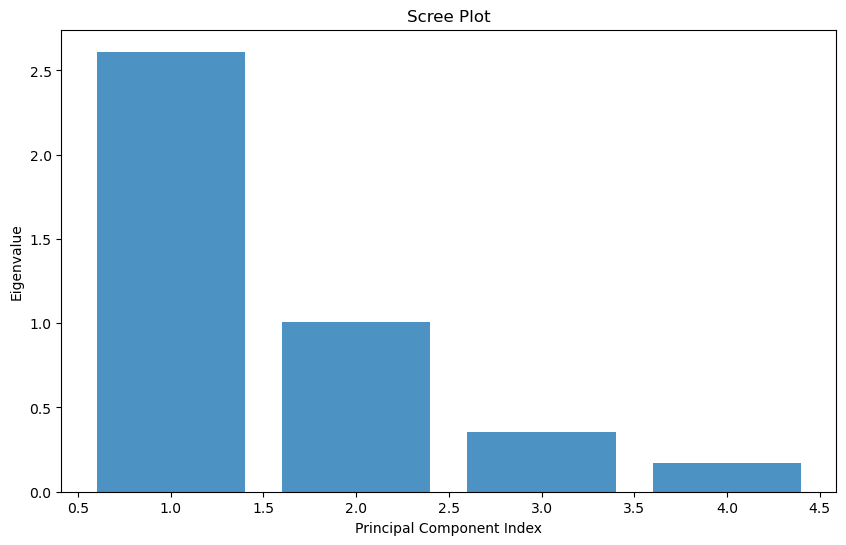

In [24]:
# Scree plot
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, alpha=0.8, align='center')
plt.title('Scree Plot')
plt.xlabel('Principal Component Index')
plt.ylabel('Eigenvalue')
plt.show()

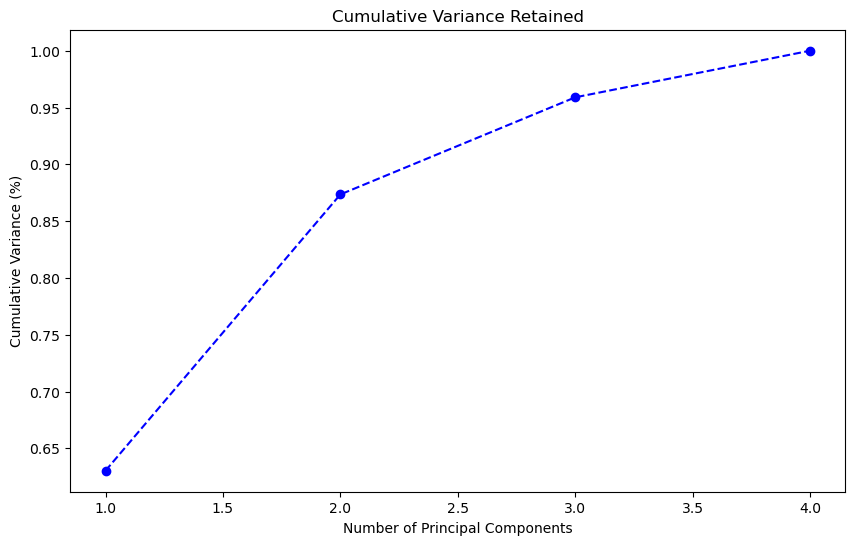

In [25]:
# Cumulative variance plot
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance (%)')
plt.show()

# Problem 2 

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error
from statsmodels.api import OLS
from statsmodels.tools import add_constant

In [27]:
# Load the BMI dataset
bmi_df = pd.read_csv('BMI.csv')
bmi_df.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,fatpctg
0,22,160.8,62.4,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,25.3
1,22,170.6,80.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,6.1
2,23,153.9,69.3,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,12.3
3,23,157.1,70.4,35.5,92.1,77.1,93.9,56.1,36.1,22.7,30.5,27.2,18.2,9.4
4,23,196.5,88.6,38.0,96.6,85.3,102.5,59.1,37.6,23.2,31.8,29.7,18.3,10.3


In [28]:
# Assume 'fatpctg' is the target variable, and the rest are features
X = bmi_df.drop(columns=['fatpctg'])
y = bmi_df['fatpctg']

In [29]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Wrapper Method

In [30]:
# Wrapper Method - Backward and Forward Stepwise Regression
import statsmodels.api as sm

def forward_stepwise_regression(X, y):
    selected_features = []
    p_max = 1
    while len(selected_features) < len(X.columns):
        p_values = []
        for col in X.columns:
            if col not in selected_features:
                X_temp = X[selected_features + [col]]
                X_temp = sm.add_constant(X_temp)
                model = sm.OLS(y, X_temp).fit()
                p_values.append((col, model.pvalues[col]))
        min_p_value = min(p_values, key=lambda x: x[1])
        if min_p_value[1] < p_max:
            selected_features.append(min_p_value[0])
        else:
            break
    return selected_features

def backward_stepwise_regression(X, y):
    selected_features = X.columns.tolist()
    p_max = 1
    while len(selected_features) > 0:
        p_values = []
        for col in selected_features:
            X_temp = X[selected_features]
            X_temp = sm.add_constant(X_temp)
            model = sm.OLS(y, X_temp).fit()
            p_values.append((col, model.pvalues[col]))
        max_p_value = max(p_values, key=lambda x: x[1])
        if max_p_value[1] > p_max:
            selected_features.remove(max_p_value[0])
        else:
            break
    return selected_features

# Assuming X and y are your feature and target variables
selected_features_forward = forward_stepwise_regression(X, y)
print("Selected features (forward stepwise):", selected_features_forward)

selected_features_backward = backward_stepwise_regression(X, y)
print("Selected features (backward stepwise):", selected_features_backward)


Selected features (forward stepwise): ['Abdomen', 'Weight', 'Wrist', 'Forearm', 'Neck', 'Age', 'Thigh', 'Hip', 'Height', 'Biceps', 'Ankle', 'Chest', 'Knee']
Selected features (backward stepwise): ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']


## Filter Method 

In [31]:
# Filter Method - Correlation Statistics
correlation_matrix = bmi_df.corr()
correlation_with_target = correlation_matrix['fatpctg'].abs().sort_values(ascending=False)
print("Feature correlation with target (descending order):")
print(correlation_with_target)

Feature correlation with target (descending order):
fatpctg    1.000000
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
Name: fatpctg, dtype: float64


## Embedded Method

In [32]:
# Embedded Method
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

In [33]:
# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_coefficients = pd.Series(lasso.coef_, index=X_train.columns).sort_values(ascending=False)

print("Lasso Regression Coefficients:")
print(lasso_coefficients)

Lasso Regression Coefficients:
Abdomen    0.980187
Biceps     0.314264
Forearm    0.232864
Thigh      0.160673
Ankle      0.134259
Age        0.064426
Knee       0.004095
Weight    -0.058331
Height    -0.066845
Chest     -0.078316
Hip       -0.127771
Neck      -0.422322
Wrist     -2.109029
dtype: float64


In [34]:
# Random Forest Feature Importance
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("Random Forest Feature Importance:")
print(feature_importances)

Random Forest Feature Importance:
Abdomen    0.714957
Weight     0.031164
Wrist      0.030504
Height     0.029040
Hip        0.028463
Neck       0.026902
Chest      0.024049
Age        0.023840
Ankle      0.019951
Biceps     0.019619
Knee       0.019410
Forearm    0.016606
Thigh      0.015493
dtype: float64
